# Examine filtering results

## Notes

- Extremely long latency at beginning of stream seems to only occur when I'm streaming something else (YouTube) in background. Won't be doing this during experiment, so don't need to worry about it
- Total time for `ping 127.0.0.1` is around 150 $\mu s$ (Yuan suggested this as a lower bound)

## Imports

In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

## Load signal and filter output from file

In [2]:
#signal_fpath = '/Users/cmcgrory/park_lab/realtime/basic_prototype/data/processed/r11_avg_fr.h5'
#with h5py.File(signal_fpath, 'r') as f:
#    signal = f['fr_avg_hz'][:]
    
filter_fpath = '/Users/cmcgrory/park_lab/realtime/basic_prototype/data/result/output_rust_lms.h5'
with h5py.File(filter_fpath, 'r') as f:
    filter_preds = f['filter_preds'][:]
    rt_times_us = f['rt_times_us'][:]

## Plot true and predicted signal values

In [3]:
# Number of data points to plot
#tmax_plot = 300

# Signal, prediction, and error
#signal_plot = signal[1:tmax_plot + 1]
#preds_plot = filter_preds[0:tmax_plot]
#err_plot = preds_plot - signal_plot

#fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

#ax_1.plot(signal_plot)
#ax_1.plot(preds_plot)
#ax_1.set(ylabel='avg. firing rate (Hz)')
#ax_1.legend(['true value', 'prediction'])

#ax_2.plot(err_plot)
#ax_2.set(xlabel='index', ylabel='error');

## Latency distribution


In [4]:
print(f'Max: {np.max(rt_times_us):.2f} us')
print(f'Min: {np.min(rt_times_us):.2f} us')
print(f'Mean: {np.mean(rt_times_us):.2f} us')
print(f'Median: {np.median(rt_times_us):.2f} us')

Max: 16773146.92 us
Min: 402441.08 us
Mean: 573800.72 us
Median: 467334.10 us


### Full distribution

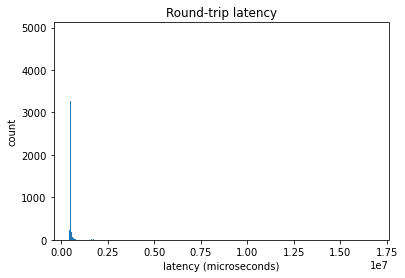

In [5]:
fig, ax = plt.subplots()
ax.hist(rt_times_us, bins=500)
ax.set(xlabel='latency (microseconds)', ylabel='count')
ax.set_title('Round-trip latency');

### Distribution with outliers removed

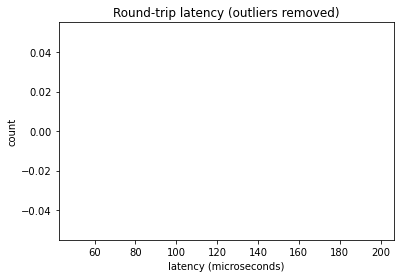

In [6]:
# Max. value for histogram (all larger values will be excluded)
hist_min = 50
hist_max = 200

fig, ax = plt.subplots()
ax.hist(rt_times_us, bins=range(hist_min, hist_max))
ax.set(xlabel='latency (microseconds)', ylabel='count')
ax.set_title('Round-trip latency (outliers removed)');

In [13]:
idx_missing = (rt_times_us < hist_min) | (rt_times_us > hist_max) 
pct_missing = np.count_nonzero(idx_missing) / rt_times_us.shape[0] * 100
print(f'Percent missing from histogram: {pct_missing:.4f}')

Percent missing from histogram: 100.0000
